In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import sqlite3

In [2]:
conn = sqlite3.connect("mydatabase.db")
cursor = conn.cursor()

<img src='https://i.redd.it/knaa04hv9l021.jpg'></img>

<img src='https://d2jmvrsizmvf4x.cloudfront.net/eS8RqLJETn66Av2d5PmB_Heart+Rate.jpg'></img>

In [3]:
np.random.seed(10)

In [4]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [5]:
normal = np.full(shape=40, fill_value=70)
normal

array([70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,
       70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70,
       70, 70, 70, 70, 70, 70])

In [6]:
pregnant = np.array([73, 76, 78, 79, 80, 80, 81, 81, 82, 82, 82, 82, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 84, 
                     85, 86, 87, 87, 87, 87, 88, 88, 89, 90, 91, 92, 93, 93, 94, 95, 96])
pregnant.size

40

In [7]:
pulse_normal = np.random.normal(loc=normal[0], scale=5, size=20000)
pulse_preg = np.random.normal(loc=pregnant[0], scale=5, size=20000)

pulse_normal = pulse_normal.astype('int32')
pulse_preg = pulse_preg.astype('int32')

num_bins = int(pulse_normal.size**0.5)

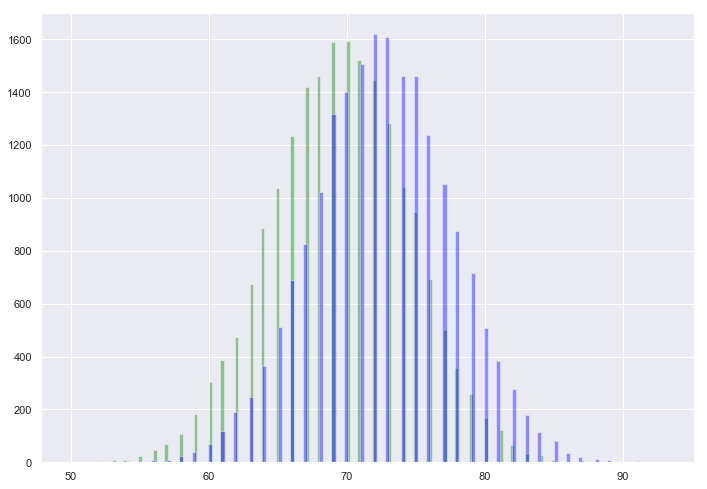

In [8]:
sns.distplot(pulse_normal, bins=num_bins, color='green', kde=False)
sns.distplot(pulse_preg, bins=num_bins, color='blue', kde=False);

C:\Users\Zohrab\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[]

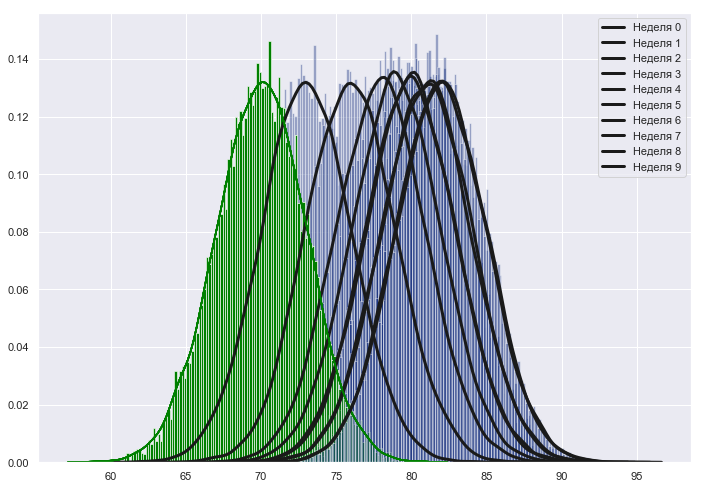

In [9]:
np.random.seed(10)

pulse_normal = np.random.normal(loc=normal[0], scale=3, size=20000)

for i in range(10):
    pulse_preg = np.random.normal(loc=pregnant[i], scale=3, size=20000)
#     pulse_preg = pulse_preg.astype('int32')
    sns.distplot(pulse_normal, bins=num_bins, color='green')
    sns.distplot(pulse_preg, bins=num_bins, color=(0.1, 0.2, 0.5, 0.3*i/10+0.01), 
                 kde_kws={"color": "k", "lw": 3, "label": 'Неделя ' + str(i)})
plt.plot()

In [10]:
data = np.random.normal(72, 4, size=30)
data = data.astype(dtype='int32')

data

array([68, 68, 75, 76, 70, 64, 56, 76, 71, 72, 75, 75, 72, 72, 71, 70, 75,
       75, 71, 74, 76, 70, 76, 80, 79, 78, 71, 70, 75, 73])

In [11]:
ttest_ind(data, np.full(shape=data.shape, fill_value=pregnant[0]), equal_var=False).pvalue / 2

0.26905743196320625

In [12]:
pregnant

array([73, 76, 78, 79, 80, 80, 81, 81, 82, 82, 82, 82, 83, 83, 83, 83, 83,
       83, 83, 83, 83, 83, 84, 85, 86, 87, 87, 87, 87, 88, 88, 89, 90, 91,
       92, 93, 93, 94, 95, 96])

# Можем определить беременность уже на 2 неделе

In [13]:
ttest_ind(data, np.full(shape=data.shape, fill_value=pregnant[1]), equal_var=False).pvalue / 2

0.0001412440138497018

In [14]:
np.random.seed(20)

for k in range(10):
    print('Предполагаемая неделя беременности: {}'.format(k+1))
    print('Средний пульс беременных на {} неделе беременности: {}'.format(k+1, pregnant[k]))
    for i in range(50, 90):
        data = np.random.normal(i, 40, size=1000)
        data = data.astype(dtype='int32')

        preg = np.full(shape=data.shape, fill_value=pregnant[k])

        p = ttest_ind(data, preg).pvalue
        
        if p/2 >= 0.05 and 1-p/2 >= 0.5:
            print('')
            print('\tСредний пульс пациента: {}'.format(i))
#             print(p, 1-p)
            print('\tВы беременны с вероятностью {:2.0f}%. Мы Вам привезем express-test с помощью курьера'.format((1-p)*100))  
            
        if p/2 < 0.05 and (i/pregnant[k]>=1.2 or i/pregnant[k] <= 0.8):
            print('Ваш пульс = {}, при норме для беременных {}. Пульс отклоняется от нормы на {:2.0f}%. Обратитесь к врачу'.format(i, pregnant[k], (i/pregnant[k] - 1)*100))
    print('')
    print('')

Предполагаемая неделя беременности: 1
Средний пульс беременных на 1 неделе беременности: 73
Ваш пульс = 50, при норме для беременных 73. Пульс отклоняется от нормы на -32%. Обратитесь к врачу
Ваш пульс = 51, при норме для беременных 73. Пульс отклоняется от нормы на -30%. Обратитесь к врачу
Ваш пульс = 52, при норме для беременных 73. Пульс отклоняется от нормы на -29%. Обратитесь к врачу
Ваш пульс = 53, при норме для беременных 73. Пульс отклоняется от нормы на -27%. Обратитесь к врачу
Ваш пульс = 54, при норме для беременных 73. Пульс отклоняется от нормы на -26%. Обратитесь к врачу
Ваш пульс = 55, при норме для беременных 73. Пульс отклоняется от нормы на -25%. Обратитесь к врачу
Ваш пульс = 56, при норме для беременных 73. Пульс отклоняется от нормы на -23%. Обратитесь к врачу
Ваш пульс = 57, при норме для беременных 73. Пульс отклоняется от нормы на -22%. Обратитесь к врачу
Ваш пульс = 58, при норме для беременных 73. Пульс отклоняется от нормы на -21%. Обратитесь к врачу

	Средни


	Средний пульс пациента: 79
	Вы беременны с вероятностью 73%. Мы Вам привезем express-test с помощью курьера

	Средний пульс пациента: 80
	Вы беременны с вероятностью 15%. Мы Вам привезем express-test с помощью курьера

	Средний пульс пациента: 81
	Вы беременны с вероятностью  8%. Мы Вам привезем express-test с помощью курьера

	Средний пульс пациента: 82
	Вы беременны с вероятностью 85%. Мы Вам привезем express-test с помощью курьера

	Средний пульс пациента: 83
	Вы беременны с вероятностью 89%. Мы Вам привезем express-test с помощью курьера


Предполагаемая неделя беременности: 7
Средний пульс беременных на 7 неделе беременности: 81
Ваш пульс = 50, при норме для беременных 81. Пульс отклоняется от нормы на -38%. Обратитесь к врачу
Ваш пульс = 51, при норме для беременных 81. Пульс отклоняется от нормы на -37%. Обратитесь к врачу
Ваш пульс = 52, при норме для беременных 81. Пульс отклоняется от нормы на -36%. Обратитесь к врачу
Ваш пульс = 53, при норме для беременных 81. Пульс откло

In [16]:
cursor.execute("""CREATE TABLE customers(
                        ID INTEGER PRIMARY KEY AUTOINCREMENT, 
                        name TEXT, 
                        surname TEXT,
                        birth_date TEXT,
                        sex TEXT
                    )""")

cursor.execute("""CREATE TABLE pulse(
                        ID INTEGER, 
                        timestamp TEXT,
                        value TEXT
                    )""")

cursor.execute("""CREATE TABLE temperature(
                        ID INTEGER, 
                        timestamp TEXT,
                        value TEXT
                    )""")

cursor.execute("""CREATE TABLE pressure(
                        ID INTEGER, 
                        timestamp TEXT,
                        value TEXT
                    )""")
cursor.execute("""CREATE TABLE oxygen(
                        ID INTEGER, 
                        timestamp TEXT,
                        value TEXT
                    )""")

cursor.execute("""CREATE TABLE height(
                        ID INTEGER, 
                        timestamp TEXT,
                        value TEXT
                    )""")
cursor.execute("""CREATE TABLE weight(
                        ID INTEGER, 
                        timestamp TEXT,
                        value TEXT
                    )""")

In [19]:
person = ('Test', 'Testova', '1990-07-27','f')

In [21]:
query = """INSERT INTO customers(
                        name, 
                        surname,
                        birth_date,
                        sex                       
                    )
                  VALUES(?,?,?,?)"""

cursor.execute(query, person)
conn.commit()

In [41]:
query = 'SELECT * FROM customers'

for row in cursor.execute(query):
        print(dict(zip(cols, row)))

{'ID': 1, 'name': 'Test', 'surname': 'Testova', 'birth_date': '1990-07-27', 'sex': 'f'}
{'ID': 2, 'name': 'Test', 'surname': 'Testova', 'birth_date': '1990-07-27', 'sex': 'f'}


In [6]:
! curl -i http://localhost:5000/todo/api/v1.0/all_users

HTTP/1.0 200 OK
Content-Type: application/json
Content-Length: 1033
Access-Control-Allow-Origin: *
Server: Werkzeug/0.15.4 Python/3.7.0
Date: Sun, 28 Jul 2019 10:24:18 GMT

{
  "tasks": [
    {
      "birth_date": "1994-04-02", 
      "name": "Zohrab", 
      "sex": "m", 
      "surname": "Ahundov", 
      "user_id": 1
    }, 
    {
      "birth_date": "1990-04-02", 
      "name": "Evgeniy", 
      "sex": "m", 
      "surname": "Stepanov", 
      "user_id": 2
    }, 
    {
      "birth_date": "1994-04-08", 
      "name": "Zs", 
      "sex": "", 
      "surname": "Ds", 
      "user_id": 3
    }, 
    {
      "birth_date": "1994-04-08", 
      "name": "Zs", 
      "sex": "", 
      "surname": "Ds", 
      "user_id": 4
    }, 
    {
      "birth_date": "", 
      "name": "", 
      "sex": "", 
      "surname": "", 
      "user_id": 5
    }, 
    {
      "birth_date": "", 
      "name": "", 
      "sex": "", 
      "surname": "", 
      "user_id": 6
    }, 
    {
      "birth_date": "", 
 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1033  100  1033    0     0   4395      0 --:--:-- --:--:-- --:--:--  4395


In [10]:
! curl -i http://localhost:5000/todo/api/v1.0/acquire/2

HTTP/1.0 201 CREATED
Content-Type: application/json
Content-Length: 21
Access-Control-Allow-Origin: *
Server: Werkzeug/0.15.4 Python/3.7.0
Date: Sun, 28 Jul 2019 10:55:37 GMT

{
  "pulse": "102"
}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100    21  100    21    0     0     89      0 --:--:-- --:--:-- --:--:--    89


In [32]:
! curl -i http://localhost:5000/todo/api/v1.0/tasks/2

HTTP/1.0 200 OK
Content-Type: application/json
Content-Length: 152
Server: Werkzeug/0.15.4 Python/3.7.0
Date: Sat, 27 Jul 2019 22:31:51 GMT

{
  "task": {
    "description": "Need to find a good Python tutorial on the web", 
    "done": false, 
    "id": 2, 
    "title": "Learn Python"
  }
}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   152  100   152    0     0    649      0 --:--:-- --:--:-- --:--:--   649


In [28]:
! curl -i http://localhost:5000/todo/api/v1.0/tasks/3

HTTP/1.0 404 NOT FOUND
Content-Type: application/json
Content-Length: 27
Server: Werkzeug/0.15.4 Python/3.7.0
Date: Sat, 27 Jul 2019 22:29:10 GMT

{
  "error": "Not found"
}


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100    27  100    27    0     0    115      0 --:--:-- --:--:-- --:--:--   115
